$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 1: Stochastic Gradient Descent for Simple Models

*Type your name and the e-mail where you want us to send your grading feedback.*

## Overview

*DELETE THE TEXT IN THIS MARKDOWN CELL AND INSERT YOUR OWN SUMMARY OF THIS.* 
For this first assignment, you will practice editing and running a juypter notebook, deriving simple gradients, and using the gradients to perform stochastic gradient descent to minimize the error of four simple models.

## Linear Model

Using the example text and latex math formatting of formulas in [04 Linear Regression Using Stochastic Gradient Descent (SGD)](http://nbviewer.ipython.org/url/www.cs.colostate.edu/~anderson/cs445/notebooks/04%20Linear%20Regression%20Using%20Stochastic%20Gradient%20Descent%20(SGD).ipynb), write and explain the derivation of the gradient of the sum of squared errors with respect to the linear model's weights and the stochastic gradient descent formula for updating the model's weights.

Using some of the code in [04 Linear Regression Using Stochastic Gradient Descent (SGD)](http://nbviewer.ipython.org/url/www.cs.colostate.edu/~anderson/cs445/notebooks/04%20Linear%20Regression%20Using%20Stochastic%20Gradient%20Descent%20(SGD).ipynb), write these functions

* `model, error_trace = train_linear(X, T,learning_rate, n_epochs)`
 
    * `X` is a two-dimensional matrix (`np.array`) with each row containing one data sample
    * `T` is a two-dimensional matrix of one column containing the target values for each sample in `X`. `X.shape[0]` is equal to `T.shape[0]`
    * `learning_rate` is the factor multiplying the negative derivative
    * `n_epochs` is the number of training epochs to iterate over
    * `model` is the two-dimensional matrix of one column containing the resulting weights
    * `error_trace` is a list of RMSE values, calculated after each epoch, using your rmse function


* `predict = use_linear(model, X)`
 
     * `X` is a two-dimensional matrix (`np.array`) with each row containing one data sample
     * `model` is the result of a call to `train_linear`
     * `predict` is a two-dimensional matrix of one column containing the predicted values for each value in `T`


 * `error = rmse(predict, T)`
 
      * `T` is a two-dimensional matrix of one column containing the target values for each sample in `X`
      * `predict` is the result of a call to `use_linear(model, X)`
      * `error` is the square root of the mean of the squared error between `predict` and `T`

# Examples for Testing Your Code

In [169]:
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape((-1, 1))
T = 0.2 - 0.03 * X + np.random.normal(0, 0.05, (n_samples, 1)) + 0.01 * (X - 8)**3
T = -0.8 - 0.04 * X  + 0.003 * (X - 2)**3

In [125]:
w, error_trace = train_linear(X, T, 0.001, 500)
print(rmse(use_linear(w, X), T))

0.2631104380467893


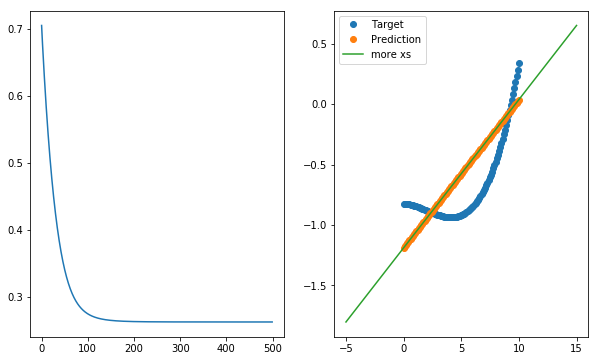

In [126]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(error_trace)

plt.subplot(1, 2, 2)
plt.plot(X, T, 'o', label='Target')
plt.plot(X, use_linear(w, X), 'o', label='Prediction')
more_xs = np.linspace(-5, 15, 100).reshape((-1, 1))
plt.plot(more_xs, use_linear(w, more_xs), label='more xs')
plt.legend();

## Tanh Model

Write two new functions that train and use a model formed by calculating the $\tanh$ function of the weighted sum of a linear model.  Given the weight vector, $\wv$, as a column vector, and the $n^{th}$ input sample, $\xv_n$, as a column vector, the prediction for the above linear model can be written as

$$ y_n = \xv_n^T \wv$$

The prediction for our $\tanh$ model is given by

$$ y_n = \tanh (\xv_n^T \wv) $$


To implement the function to train a $\tanh$ model, you must derive the grad9ejt of the sum of squared error function with respect to the weights.  This derivation now involves the gradient of the $\tanh$ function. Use latex math notation to show this derivation.  Search the net for help.  [This site, for example](https://theclevermachine.wordpress.com/2014/09/08/derivation-derivatives-for-common-neural-network-activation-functions/) is amazingly helpful.  Remember the [chain rule](https://math.stackexchange.com/questions/78575/derivative-of-sigmoid-function-sigma-x-frac11e-x) for taking derivatives?


Now define the two new functions you will need:

 * `model = train_tanh(X, T,learning_rate, number_of_iterations)`
 

 * `predict = use_tanh(model, X)`

In [128]:
w, error_trace = train_tanh(X, T, 0.001, 500)
print(rmse(use_tanh(w, X), T))

0.1517949939609252


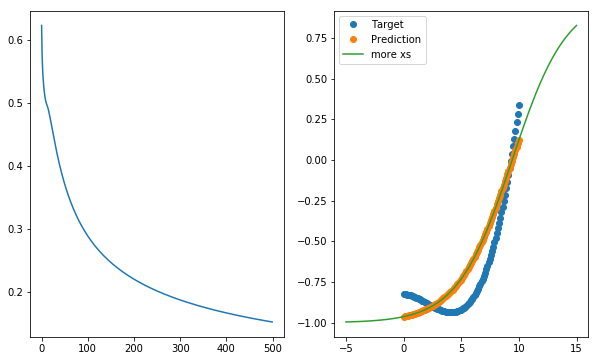

In [129]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(error_trace)

plt.subplot(1, 2, 2)
plt.plot(X, T, 'o', label='Target')
plt.plot(X, use_tanh(w, X), 'o', label='Prediction')
# more_xs = np.linspace(-2, 12, 100).reshape((-1, 1))
plt.plot(more_xs, use_tanh(w, more_xs), label='more xs')

plt.legend();

## Grading

Your notebook will be run and graded automatically.  Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A1grader.tar) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session.  You should see a perfect execution score of 75 out of 75 points if your functions are defined correctly. The remaining 25 points will be based on the results you obtain from the energy data and on your discussions.

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

A different, but similar, grading script will be used to grade your checked-in notebook.  It will include additional tests.  You need not include code to test that the values passed in to your functions are the correct form.  

In [168]:
%run -i "A1grader.py"


======================= Code Execution =======================

Extracting python code from notebook named 'Anderson-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  T = (((X - 5) * 0.05 +  (X * 0.2) **5) / 5.0 - 5.5) / 6
  w, errors = train_linear(X, T, 0.01, 1000)

--- 15/15 points. Returned correct values.

Testing
  prediction = use_linear(w, X)

--- 15/15 points. Returned correct values.

Testing
  rmse_error = rmse(prediction, T)

--- 15/15 points. Returned correct values.

Testing
  w, errors = train_tanh(X, T, 0.01, 1000)

--- 15/15 points. Returned correct values.

Testing
  prediction = use_tanh(w, X)

--- 15/15 points. Returned correct values.

notebooks Execution Grade is 75 / 75

 Remaining 25 points will be based on your text describing the derivation of gradients, explanations of code, and plots.

notebooks FINAL GRADE is   / 10

## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/80879).

Grading will be based on 

  * correct behavior of the required functions listed above,
  * easy to understand plots in your notebook,
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook.

## Extra Credit

Define two new functions to handle the logistic, or sigmoid, function model, 

$$ y_n = \frac{1}{1 + e^{- \xv_n^T \wv}} $$